In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mentari as mtr

In [3]:
BoxSize = 62.5
Hubble_h = 0.73

firstfile = 0
lastfile = 
directory = 'mini-millennium/' #change this to the output directory of sage
filename = 'model'
redshift = [127.000, 79.998, 50.000, 30.000, 19.916, 18.244, 16.725, 15.343, 14.086, 12.941, 11.897, 10.944, 10.073, 9.278, 8.550, 7.883, 7.272, 6.712, 6.197, 5.724, 5.289, 4.888, 4.520, 4.179, 3.866, 3.576, 3.308, 3.060, 2.831, 2.619, 2.422, 2.239, 2.070, 1.913, 1.766, 1.630, 1.504, 1.386, 1.276, 1.173, 1.078, 0.989, 0.905, 0.828, 0.755, 0.687, 0.624, 0.564, 0.509, 0.457, 0.408, 0.362, 0.320, 0.280, 0.242, 0.208, 0.175, 0.144, 0.116, 0.089, 0.064, 0.041, 0.020, 0.000]

# Mass and Metallicity History 

To save the properties of all galaxies in the redshift list

In [4]:
G = mtr.read_properties(redshift, firstfile, lastfile, directory, filename)

Here is an example on how to get the stellar mass of all galaxies in the last redshift in the redshift list (z=0)

In [5]:
s_mass = G[63].StellarMass * 1.e10 / Hubble_h

Here is how to construct the mass and metallicity history of all galaxies in each redshift. Note that the order of the snapshot in the result will be in reverse with the redshift order.

In [6]:
mass, metal = mtr.build_history(redshift, firstfile, lastfile, directory, filename)

Constructing mass history of snapshot:
0 / 63
1 / 63
2 / 63
3 / 63
4 / 63
5 / 63
6 / 63
7 / 63
8 / 63
9 / 63
10 / 63
11 / 63
12 / 63
13 / 63
14 / 63
15 / 63
16 / 63
17 / 63
18 / 63
19 / 63
20 / 63
21 / 63
22 / 63
23 / 63
24 / 63
25 / 63
26 / 63
27 / 63
28 / 63
29 / 63
30 / 63
31 / 63
32 / 63
33 / 63
34 / 63
35 / 63
36 / 63
37 / 63
38 / 63
39 / 63
40 / 63
41 / 63
42 / 63
43 / 63
44 / 63
45 / 63
46 / 63
47 / 63
48 / 63
49 / 63
50 / 63
51 / 63
52 / 63
53 / 63
54 / 63
55 / 63
56 / 63
57 / 63
58 / 63
59 / 63
60 / 63
61 / 63
62 / 63
63 / 63


Compare the final computed mass of galaxies with the mass from SAGE

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log10
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in log10
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in log10
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in subtract


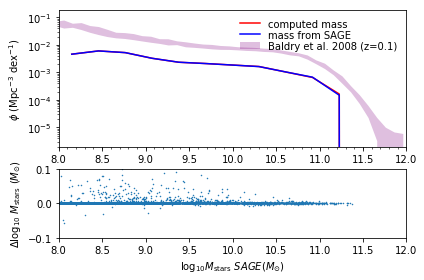

In [7]:
#take the recycle fraction in account
rec_frac = 0.43
c_mass = mass[0] * (1. - rec_frac) / Hubble_h #final computed mass

LastSnap = len(redshift) - 1
s_mass = G[LastSnap].StellarMass * 1.e10 / Hubble_h

#Plot stellar mass
binwidth = 0.3
ax0 = plt.subplot2grid((1,1), (0,0))
divider = make_axes_locatable(ax0) 
ax1 = divider.append_axes("bottom", size="50%", pad=0.3)

# Baldry+ 2008 modified data used for the MCMC fitting
Baldry = np.array([
            [7.05, 1.3531e-01, 6.0741e-02],
            [7.15, 1.3474e-01, 6.0109e-02],
            [7.25, 2.0971e-01, 7.7965e-02],
            [7.35, 1.7161e-01, 3.1841e-02],
            [7.45, 2.1648e-01, 5.7832e-02],
            [7.55, 2.1645e-01, 3.9988e-02],
            [7.65, 2.0837e-01, 4.8713e-02],
            [7.75, 2.0402e-01, 7.0061e-02],
            [7.85, 1.5536e-01, 3.9182e-02],
            [7.95, 1.5232e-01, 2.6824e-02],
            [8.05, 1.5067e-01, 4.8824e-02],
            [8.15, 1.3032e-01, 2.1892e-02],
            [8.25, 1.2545e-01, 3.5526e-02],
            [8.35, 9.8472e-02, 2.7181e-02],
            [8.45, 8.7194e-02, 2.8345e-02],
            [8.55, 7.0758e-02, 2.0808e-02],
            [8.65, 5.8190e-02, 1.3359e-02],
            [8.75, 5.6057e-02, 1.3512e-02],
            [8.85, 5.1380e-02, 1.2815e-02],
            [8.95, 4.4206e-02, 9.6866e-03],
            [9.05, 4.1149e-02, 1.0169e-02],
            [9.15, 3.4959e-02, 6.7898e-03],
            [9.25, 3.3111e-02, 8.3704e-03],
            [9.35, 3.0138e-02, 4.7741e-03],
            [9.45, 2.6692e-02, 5.5029e-03],
            [9.55, 2.4656e-02, 4.4359e-03],
            [9.65, 2.2885e-02, 3.7915e-03],
            [9.75, 2.1849e-02, 3.9812e-03],
            [9.85, 2.0383e-02, 3.2930e-03],
            [9.95, 1.9929e-02, 2.9370e-03],
            [10.05, 1.8865e-02, 2.4624e-03],
            [10.15, 1.8136e-02, 2.5208e-03],
            [10.25, 1.7657e-02, 2.4217e-03],
            [10.35, 1.6616e-02, 2.2784e-03],
            [10.45, 1.6114e-02, 2.1783e-03],
            [10.55, 1.4366e-02, 1.8819e-03],
            [10.65, 1.2588e-02, 1.8249e-03],
            [10.75, 1.1372e-02, 1.4436e-03],
            [10.85, 9.1213e-03, 1.5816e-03],
            [10.95, 6.1125e-03, 9.6735e-04],
            [11.05, 4.3923e-03, 9.6254e-04],
            [11.15, 2.5463e-03, 5.0038e-04],
            [11.25, 1.4298e-03, 4.2816e-04],
            [11.35, 6.4867e-04, 1.6439e-04],
            [11.45, 2.8294e-04, 9.9799e-05],
            [11.55, 1.0617e-04, 4.9085e-05],
            [11.65, 3.2702e-05, 2.4546e-05],
            [11.75, 1.2571e-05, 1.2571e-05],
            [11.85, 8.4589e-06, 8.4589e-06],
            [11.95, 7.4764e-06, 7.4764e-06],
            ], dtype=np.float32)
        
        # Finally plot the data
        # plt.errorbar(
        #     Baldry[:, 0],
        #     Baldry[:, 1],
        #     yerr=Baldry[:, 2],
        #     color='g',
        #     linestyle=':',
        #     lw = 1.5,
        #     label='Baldry et al. 2008',
        #     )
Baldry_xval = np.log10(10 ** Baldry[:, 0]  /Hubble_h/Hubble_h)
Baldry_xval = Baldry_xval - 0.26  # convert back to Chabrier IMF
Baldry_yvalU = (Baldry[:, 1]+Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h
Baldry_yvalL = (Baldry[:, 1]-Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h

ax0.fill_between(Baldry_xval, Baldry_yvalU, Baldry_yvalL, 
    facecolor='purple', alpha=0.25, label='Baldry et al. 2008 (z=0.1)')

mi = 8
ma = 12
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(np.log10(c_mass), range=(mi, ma), bins=NB)
(Counts, Binedges) = np.histogram(np.log10(s_mass), range=(mi, ma), bins=NB)


# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth
Xaxeshisto = Binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
ax0.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, c ='r', label='computed mass')
ax0.plot(Xaxeshisto, Counts / (BoxSize/Hubble_h)**3 / binwidth, c='b', label='mass from SAGE')
ax0.set_yscale('log', nonposy='clip')
ax0.set_xlim(8.0, 12.0)


# Set the x-axis minor ticks
ax0.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax0.set_ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1}$)')  # Set the y...

ax1.scatter(np.log10(s_mass), (np.log10(c_mass) - np.log10(s_mass)), marker='.', s=4, linewidths=0.5)
ax1.set_ylabel(r'$\Delta \log_{10}\ M_{\mathrm{stars}}\ (M_{\odot})$')
ax1.set_xlabel(r'$\log_{10} M_{\mathrm{stars}}\ SAGE (M_{\odot})$')
ax1.set_ylim(-0.1, 0.1)
ax1.set_xlim(8, 12)

leg = ax0.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.tight_layout()
plt.show()

# SED construction

In [9]:
age = np.asarray([0.0124, 0.0246, 0.0491, 0.1037, 0.1871, 0.2120, 0.2399, 0.2709, 0.3054, 0.3438, 0.3864, 0.4335, 0.4856, 0.5430, 0.6062, 0.6756, 0.7517, 0.8349, 0.9259, 1.0249, 1.1327, 1.2496, 1.3763, 1.5131, 1.6606, 1.8192, 1.9895, 2.1717, 2.3662, 2.5734, 2.7934, 3.0265, 3.2726, 3.5318, 3.8038, 4.0886, 4.3856, 4.6944, 5.0144, 5.3488, 5.6849, 6.0337, 6.3901, 6.7531, 7.1215, 7.4940, 7.8694, 8.2464, 8.6238, 9.0004, 9.3750, 9.7463, 10.1133, 10.4750, 10.8303, 11.1783, 11.5181, 11.8490, 12.1702, 12.4811, 12.7810, 13.0695, 13.3459, 13.6098])
lookbacktime = sorted((np.array([13.6098]*len(age)) - age) * 1.e9)
w=np.where(age<9.5)
print(w, age[w])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),) [ 0.0124  0.0246  0.0491  0.1037  0.1871  0.212   0.2399  0.2709  0.3054
  0.3438  0.3864  0.4335  0.4856  0.543   0.6062  0.6756  0.7517  0.8349
  0.9259  1.0249  1.1327  1.2496  1.3763  1.5131  1.6606  1.8192  1.9895
  2.1717  2.3662  2.5734  2.7934  3.0265  3.2726  3.5318  3.8038  4.0886
  4.3856  4.6944  5.0144  5.3488  5.6849  6.0337  6.3901  6.7531  7.1215
  7.494   7.8694  8.2464  8.6238  9.0004  9.375 ]


Build SED for a specific galaxy specified by one of its properties, e.g. mass. We are going to make SED of a galaxy with the highest stellar mass

In [11]:
w = np.where(c_mass == max(c_mass))[0]

In [12]:
wavelength, spectra = mtr.generate_SED(lookbacktime, mass[:,w], metal[:,w]) #wavelength in Angstorm, spectra in Lsun/Angstorm

Building SED
0 / 219
1 / 219
2 / 219
3 / 219
4 / 219
5 / 219
6 / 219
7 / 219
8 / 219
9 / 219
10 / 219
11 / 219
12 / 219
13 / 219
14 / 219
15 / 219
16 / 219
17 / 219
18 / 219
19 / 219
20 / 219
21 / 219
22 / 219
23 / 219
24 / 219
25 / 219
26 / 219
27 / 219
28 / 219
29 / 219
30 / 219
31 / 219
32 / 219
33 / 219
34 / 219
35 / 219
36 / 219
37 / 219
38 / 219
39 / 219
40 / 219
41 / 219
42 / 219
43 / 219
44 / 219
45 / 219
46 / 219
47 / 219
48 / 219
49 / 219
50 / 219
51 / 219
52 / 219
53 / 219
54 / 219
55 / 219
56 / 219
57 / 219
58 / 219
59 / 219
60 / 219
61 / 219
62 / 219
63 / 219
64 / 219
65 / 219
66 / 219
67 / 219
68 / 219
69 / 219
70 / 219
71 / 219
72 / 219
73 / 219
74 / 219
75 / 219
76 / 219
77 / 219
78 / 219
79 / 219
80 / 219
81 / 219
82 / 219
83 / 219
84 / 219
85 / 219
86 / 219
87 / 219
88 / 219
89 / 219
90 / 219
91 / 219
92 / 219
93 / 219
94 / 219
95 / 219
96 / 219
97 / 219
98 / 219
99 / 219
100 / 219
101 / 219
102 / 219
103 / 219
104 / 219
105 / 219
106 / 219
107 / 219
108 / 219
109 / 2

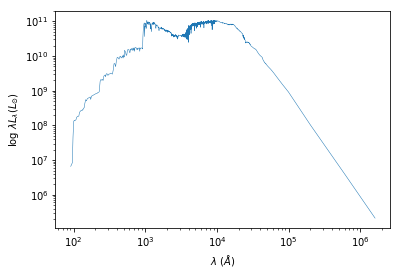

In [13]:
#To plot the spectra:

ax = plt.subplot2grid((1,1), (0,0))
divider = make_axes_locatable(ax)
ax.plot(np.array(wavelength), spectra[0] * np.array(wavelength), lw=0.5)
ax.set_xlabel(r'$\lambda\ (\AA) $')
ax.set_ylabel(r'log $\lambda L_{\lambda} (L_{\odot})$')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

To compute the AB magnitude of that galaxy, first specify the filter(s) and redshift (z != 0 will automatically give apparent magnitude in that redshift)

In [12]:
filter_list = ('Sdss_u', 'Sdss_g', 'Sdss_r', 'Sdss_i', 'Sdss_z')
z = 0.

In [13]:
mab_list = mtr.mab(wavelength, spectra, filter_list, z)

In [14]:
print(mab_list)

[array([-20.24665635]), array([-21.84051846]), array([-22.59618236]), array([-22.95909222]), array([-23.2176636])]


# Luminosity Function

In [ ]:
#Construct SED and magnitude of all galaxies (this will take time)
wavelength, total_lum = mtr.generate_SED(lookbacktime, mass, metal) #wavelength in Angstorm, spectra in Lsun/Angstorm
mab_list = mtr.mab(wavelength, total_lum, filter_list, z)

Snapshot number 
0 / 219
1 / 219
2 / 219
3 / 219
4 / 219
5 / 219
6 / 219
7 / 219
8 / 219
9 / 219
10 / 219
11 / 219
12 / 219
13 / 219
14 / 219
15 / 219
16 / 219
17 / 219
18 / 219
19 / 219
20 / 219
21 / 219
22 / 219
23 / 219
24 / 219
25 / 219
26 / 219
27 / 219
28 / 219
29 / 219
30 / 219
31 / 219
32 / 219
33 / 219
34 / 219
35 / 219
36 / 219
37 / 219
38 / 219
39 / 219
40 / 219
41 / 219
42 / 219
43 / 219
44 / 219
45 / 219
46 / 219
47 / 219
48 / 219
49 / 219
50 / 219
51 / 219
52 / 219
53 / 219
54 / 219
55 / 219
56 / 219
57 / 219
58 / 219
59 / 219
60 / 219
61 / 219
62 / 219
63 / 219
64 / 219
65 / 219
66 / 219
67 / 219
68 / 219
69 / 219
70 / 219
71 / 219
72 / 219
73 / 219
74 / 219
75 / 219
76 / 219
77 / 219
78 / 219
79 / 219
80 / 219
81 / 219
82 / 219
83 / 219
84 / 219
85 / 219
86 / 219
87 / 219
88 / 219
89 / 219
90 / 219
91 / 219
92 / 219
93 / 219
94 / 219
95 / 219
96 / 219
97 / 219
98 / 219
99 / 219
100 / 219
101 / 219
102 / 219
103 / 219
104 / 219
105 / 219
106 / 219
107 / 219
108 / 219
109

/Users/dtriani/work/sage_sed/output/SED/SED.py:765: RuntimeWarning: divide by zero encountered in log10
  mAB = -2.5*np.log10(fnu) - 48.6
/Users/dtriani/work/sage_sed/output/SED/SED.py:765: RuntimeWarning: invalid value encountered in log10
  mAB = -2.5*np.log10(fnu) - 48.6


/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


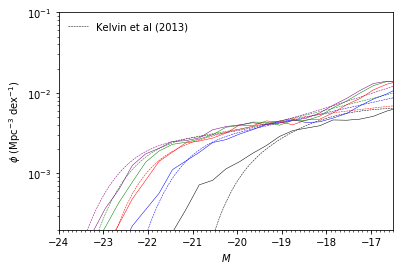

In [ ]:
#plot the Luminosity Function vs Kelvin et al. 2013

hubble=0.73
label = ['Mu', 'Mg', 'Mr', 'Mi', 'Mz']
color = ('black', 'blue', 'red', 'green', 'purple')

mi = -30.0
ma = -15.0
binwidth = 0.3
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.01)

plt.figure()
ax =plt.subplot(111)

# Observations from Kelvin et al. 2013
# SDSS u
Mstar = -18.53
alpha1 = -0.91
phistar1 = 0.00964
alpha2 = 1.25
phistar2 = 0.00146
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * (phistar1 * xval ** (alpha1+1) + phistar2 * xval ** (alpha2+1)) * np.exp(-xval)      
plt.plot(M, yval, '--', c=color[0], lw=0.5, label='Kelvin et al (2013)')
# SDSS g
Mstar = -20.28
alpha1 = -1.29
phistar1 = 0.00351
alpha2 = 0.06
phistar2 = 0.00488
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * (phistar1 * xval ** (alpha1+1) + phistar2 * xval ** (alpha2+1)) * np.exp(-xval)          
plt.plot(M, yval, '--', c=color[1],lw=0.5)
# SDSS r
Mstar = -20.90
alpha1 = -1.13
phistar1 = 0.00451
alpha2 = 0.53
phistar2 = 0.00301
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * (phistar1 * xval ** (alpha1+1) + phistar2 * xval ** (alpha2+1)) * np.exp(-xval)          
plt.plot(M, yval, '--', c=color[2],lw=0.5)
# SDSS i
Mstar = -21.45
alpha1 = -1.35
phistar1 = 0.00220
alpha2 = -0.09
phistar2 = 0.00487
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * (phistar1 * xval ** (alpha1+1) + phistar2 * xval ** (alpha2+1)) * np.exp(-xval)              
plt.plot(M, yval, '--', c=color[3], lw=0.5)
# SDSS z
Mstar = -21.78
alpha1 = -1.46
phistar1 = 0.0014
alpha2 = -0.26
phistar2 = 0.00505
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * (phistar1 * xval ** (alpha1+1) + phistar2 * xval ** (alpha2+1)) * np.exp(-xval)                
plt.plot(M, yval, '--', c=color[4], lw=0.5)

for i in range(len(mab_list)):
    
    counts, binedges = np.histogram(mab_list[i], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ ((BoxSize/Hubble_h)**3) / binwidth, c=color[i], lw=0.5)


plt.yscale('log', nonposy='clip')
plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$M$')
plt.ylim(2e-4, 1e-1)
plt.xlim(-24, -16.5)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
#plt.savefig('tao-Kelvin.png')
plt.show()